# 07 Recurrent Neural Network (1)
* many to many (character, long character)
* many to one (stocks)

* [강의출처](https://www.youtube.com/watch?v=37jxyHXzxU4&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=29&t=0s)

## Summary

* one_hot 하는 스킬 (np.eye)

# Ex) Hihello

In [540]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mnist dataset
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [130]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(42)
if device == 'cuda':
    torch.cuda.manual_seed_all(42)

In [131]:
# data
sample = " hihello"
char_set = list(set(sample))
char_dic = {c: i for i, c in enumerate(char_set)}

In [148]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
learning_rate = 0.1

In [149]:
# data setting
sample_idx = [char_dic[c] for c in sample]
x_data = [sample_idx[:-1]]
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
y_data = [sample_idx[1:]]

In [150]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [151]:
X.shape, Y.shape

(torch.Size([1, 7, 6]), torch.Size([1, 7]))

In [270]:
# declare RNN
rnn = nn.RNN(dic_size, hidden_size, batch_first=True)
rnn

RNN(6, 6, batch_first=True)

In [271]:
# loss & optimizer setting
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [272]:
# start training
for i in range(100):
    outputs, _status = rnn(X)
    cost = criterion(outputs.view(-1, dic_size), Y.view(-1))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    result = outputs.argmax(dim=2)
    result_str = ''.join([char_set[c] for c in result.squeeze().numpy()])
    if i % 10 == 0:
        print(i, "cost: ", cost.data.numpy(), "prediction str: ", result_str)

0 cost:  1.785338 prediction str:  eholhoo
10 cost:  0.80626357 prediction str:  hihello
20 cost:  0.6313711 prediction str:  hihello
30 cost:  0.5934474 prediction str:  hihello
40 cost:  0.577256 prediction str:  hihello
50 cost:  0.5692044 prediction str:  hihello
60 cost:  0.5642274 prediction str:  hihello
70 cost:  0.5607892 prediction str:  hihello
80 cost:  0.55814224 prediction str:  hihello
90 cost:  0.55599105 prediction str:  hihello


# Ex) Long Sequence

In [286]:
# raw data
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [278]:
idx2char = list(set(sentence))
char2idx = {c:i for i, c in enumerate(idx2char)}

In [335]:
# constants
input_size = len(char2idx)
output_size = len(char2idx)
sequnce_length = 10
learning_rate = 0.01

In [336]:
# data setting
x_data = []
y_data = []

for i in range(len(sentence) - sequence_length):
    x_data.append([char2idx[c] for c in sentence[i: i + sequence_length]])
    y_data.append([char2idx[c] for c in sentence[i+1: i + sequence_length + 1]])

x_one_hot = [np.eye(input_size)[x] for x in x_data]

In [337]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

X.shape, Y.shape

(torch.Size([170, 10, 25]), torch.Size([170, 10]))

In [458]:
# model
class Seq2SeqRnn(nn.Module):
    def __init__(self, input_size, output_size, layers):
        super(Seq2SeqRnn, self).__init__()
        self.rnn = nn.RNN(input_size, output_size, num_layers=layers, batch_first=True)
        self.fc = nn.Linear(output_size, output_size, bias=True)
    
    def forward(self, x):
        out, _status = self.rnn(x)
        print(out.shape)
        out = self.fc(out)
        print(out.shape)
        return out

In [459]:
model = Seq2SeqRnn(input_size, output_size, 4)

In [460]:
model

Seq2SeqRnn(
  (rnn): RNN(25, 25, num_layers=4, batch_first=True)
  (fc): Linear(in_features=25, out_features=25, bias=True)
)

In [461]:
model(torch.Tensor(10,7,25))

torch.Size([10, 7, 25])
torch.Size([10, 7, 25])


tensor([[[-3.0347e-02, -1.6490e-01,  8.8034e-02,  ..., -1.5329e-01,
           2.6490e-01,  2.9923e-01],
         [ 9.0606e-02, -1.6130e-01,  1.0084e-02,  ..., -3.0234e-01,
           1.6492e-01,  4.5132e-01],
         [-7.8708e-02, -1.8995e-01,  3.0909e-01,  ..., -2.8729e-01,
           1.4487e-02,  2.3823e-01],
         ...,
         [-6.6306e-02, -7.3765e-02, -6.7330e-02,  ..., -3.5411e-01,
           3.4090e-01,  3.8405e-01],
         [ 4.1509e-02, -2.9410e-01,  2.3255e-01,  ..., -4.5329e-01,
           2.2450e-01,  3.6393e-01],
         [-1.2384e-01, -2.8229e-01,  2.3267e-01,  ..., -2.1551e-01,
           2.9708e-02,  2.8109e-01]],

        [[ 1.1923e-02, -1.5603e-01,  7.3287e-02,  ..., -2.0609e-01,
           2.3043e-01,  3.7064e-01],
         [ 1.3511e-01, -1.1669e-01,  1.0412e-01,  ..., -3.7979e-01,
           1.4445e-01,  4.3372e-01],
         [ 5.5976e-02, -1.8627e-01,  2.3233e-01,  ..., -3.4476e-01,
           1.2706e-01,  3.8075e-01],
         ...,
         [-1.6690e-01, -4

In [346]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), learning_rate)

In [347]:
# train
nb_epochs = 10000

for epoch in range(1, nb_epochs + 1):
    
    hypothesis = model(X)
    cost = criterion(hypothesis.view(-1, output_size), Y.view(-1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        results = hypothesis.argmax(dim=2)
        predicted_str = ""
        
        for i, result in enumerate(results):
            if i == 0:
                predicted_str += ''.join([idx2char[c] for c in result])
            else:
                predicted_str += idx2char[result[-1]]
        
        print(predicted_str)

t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
p you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them task

# Ex) Time Series

In [569]:
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [570]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [571]:
data = pd.read_csv('./samples/stocks.csv', header=None)
data.columns = ['open', 'high', 'low', 'volume', 'close']
data = data.values
data = data[::-1]

In [572]:
train_size = int(len(data) * 0.7)
train_data = data[0:train_size]
test_data = data[train_size-sequence_length:]

In [573]:
train_data = minmax_scaler(train_data)
test_data = minmax_scaler(test_data)

In [574]:
# constants
input_shape = 5
hidden_shape = 10
output_shape = 1
sequence_length = 7
learning_rate = 0.01
nb_epochs = 500

In [575]:
x_train, y_train = build_dataset(train_data, sequence_length)
x_test, y_test = build_dataset(test_data, sequence_length)

In [576]:
# convert to tensor
trainX_tensor = torch.FloatTensor(x_train)
trainY_tensor = torch.FloatTensor(y_train)

testX_tensor = torch.FloatTensor(x_test)
testY_tensor = torch.FloatTensor(y_test)

trainX_tensor.shape, testX_tensor.shape, trainY_tensor.shape, testY_tensor.shape

(torch.Size([505, 7, 5]),
 torch.Size([220, 7, 5]),
 torch.Size([505, 1]),
 torch.Size([220, 1]))

In [577]:
class Many2OneRNN(nn.Module):
    def __init__(self, input_shape, hidden_shape, output_shape, layers):
        super(Many2OneRNN, self).__init__()
        
        self.rnn = nn.LSTM(input_shape, hidden_shape, num_layers=layers, batch_first=True)
        self.fc = nn.Linear(hidden_shape, output_shape, bias=True)
        
    def forward(self, x):
        outs, _states = self.rnn(x)
        outs = self.fc(outs[:,-1])
        return outs
        

In [582]:
model = Many2OneRNN(input_shape, hidden_shape, output_shape, 2)
model

Many2OneRNN(
  (rnn): LSTM(5, 10, num_layers=2, batch_first=True)
  (fc): Linear(in_features=10, out_features=1, bias=True)
)

In [583]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), learning_rate)

In [584]:
# start training
for epoch in range(1, nb_epochs+1):
    
    hypothesis = model(trainX_tensor)
    cost = criterion(hypothesis, trainY_tensor)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 30 == 0:
        hypothesis_val = model(testX_tensor)
        cost_val = criterion(hypothesis_val, testY_tensor)
        print("[tr COST]: ", cost.data.numpy(), "[val COST]: ", cost_val.data.numpy())

[tr COST]:  0.02797265 [val COST]:  0.023203934
[tr COST]:  0.00331543 [val COST]:  0.0058387686
[tr COST]:  0.0025906118 [val COST]:  0.0054488014
[tr COST]:  0.002312128 [val COST]:  0.004588767
[tr COST]:  0.0021616516 [val COST]:  0.004350167
[tr COST]:  0.0020538536 [val COST]:  0.004149911
[tr COST]:  0.0019623686 [val COST]:  0.003970063
[tr COST]:  0.0018810214 [val COST]:  0.0038076472
[tr COST]:  0.001807337 [val COST]:  0.0036579883
[tr COST]:  0.001739486 [val COST]:  0.0035175562
[tr COST]:  0.0016760405 [val COST]:  0.0033837946
[tr COST]:  0.0016161279 [val COST]:  0.0032551917
[tr COST]:  0.0015594534 [val COST]:  0.0031312457
[tr COST]:  0.0015061385 [val COST]:  0.0030122327
[tr COST]:  0.001456484 [val COST]:  0.0028989448
[tr COST]:  0.0014108261 [val COST]:  0.0027925265


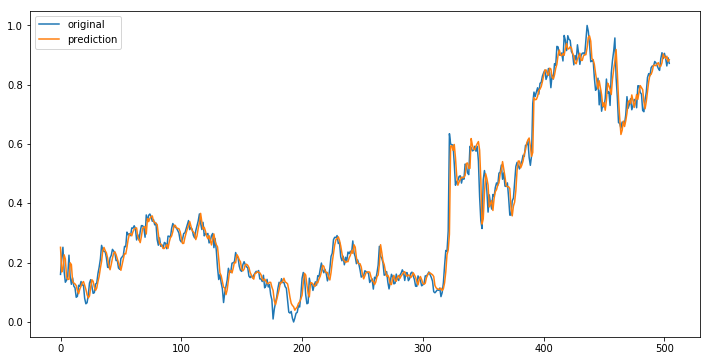

In [586]:
plt.figure(figsize=(12,6))
plt.plot(y_train)
plt.plot(model(trainX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()

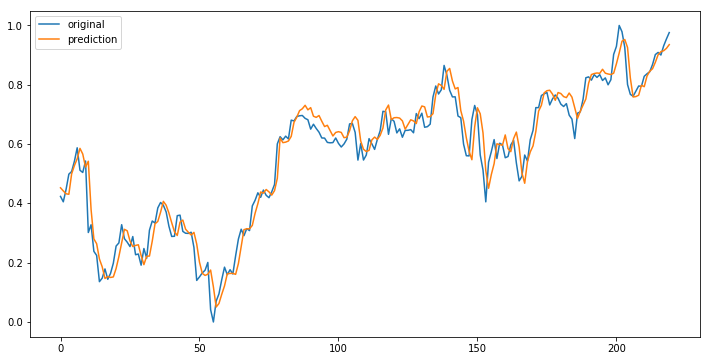

In [587]:
plt.figure(figsize=(12,6))
plt.plot(y_test)
plt.plot(model(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()